In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
print("Setup Complete")

Setup Complete


# Basic Info

In [2]:
spotify = pd.read_csv('./data/spotify_data/Spotify_Dataset_V3.csv', sep=';', parse_dates=['Date'], dayfirst=True)
spotify.head()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...


In [3]:
spotify.sort_index()

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
2,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
3,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
4,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 2,Peso Pluma,Nationality 2,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,197,Oh Lord,MiC LOWRY,2017-01-01,0.273,0.794,-6644.0,0.068,0.022,0.000,0.377,Artist 1,MiC LOWRY,Nationality 1,United Kingdom,Europe,4,4.0,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...
651932,198,Superstition - Single Version,Stevie Wonder,2017-01-01,0.650,0.658,-10908.0,0.085,0.089,0.004,0.883,Artist 1,Stevie Wonder,Nationality 1,United States,Anglo-America,3,3.0,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...
651933,199,Secrets,The Weeknd,2017-01-01,0.665,0.771,-5779.0,0.053,0.016,0.000,0.764,Artist 1,The Weeknd,Nationality 1,Canada,Anglo-America,2,2.0,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...
651934,200,Ni**as In Paris,"JAY-Z, Kanye West",2017-01-01,0.757,0.882,-6125.0,0.248,0.076,0.000,0.684,Artist 1,JAY-Z,Nationality 1,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...


In [4]:
spotify.shape

(651936, 20)

In [5]:
spotify.columns

Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL'],
      dtype='object')

In [6]:
spotify.describe()

,Rank,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,Points (Total),Points (Ind for each Artist/Nat)
count,651936.000000,651936,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000,651936.000000
mean,100.407782,2020-03-26 22:03:35.226035200,0.697730,0.652049,-5295.645217,0.109946,0.230694,0.007647,0.523134,100.592218,72.391141
min,1.000000,2017-01-01 00:00:00,0.073000,0.005000,-34475.000000,0.022000,0.000000,0.000000,0.026000,1.000000,0.200000
25%,51.000000,2018-08-23 00:00:00,0.617000,0.549000,-6825.000000,0.045000,0.048000,0.000000,0.356000,51.000000,28.000000
50%,100.000000,2020-03-16 00:00:00,0.719000,0.671000,-5206.000000,0.068000,0.152000,0.000000,0.521000,101.000000,60.000000
75%,150.000000,2021-11-16 00:00:00,0.793000,0.771000,-3885.000000,0.136000,0.349000,0.000000,0.696000,150.000000,104.000000
max,200.000000,2023-05-29 00:00:00,0.985000,0.996000,1509.000000,0.966000,0.994000,0.956000,0.982000,200.000000,200.000000
std,57.406664,NaN,0.133186,0.155684,2785.261321,0.096841,0.230710,0.054724,0.223926,57.406664,54.227892


In [7]:
spotify['id'].value_counts()

id
6RUKPb4LETWmmr3iAEQktW    2602
0RiRZpuVRbi7oqRdSMwhQY    2596
7BKLCZ1jbUBVqRi2FVlTVw    2532
2VxeLyX666F8uXCJ0dZF8B    2504
0tgVpDi06FyKpA1z0VMD4v    2251
                          ... 
2chIkORxBLpPVgruGiMY8k       1
2fHZHwEp6TP2ClC1S8ihVN       1
4ow1etGbQ8kfbAT3QPlmhN       1
5f8OFV8uUTKhSFTmjinwFE       1
5euRP53moGQyGCsq8aNjvo       1
Name: count, Length: 9161, dtype: int64

There are some tracks sharing same title

In [8]:
print(len(spotify['Title'].unique()))
print(len(spotify['id'].unique()))

7457
9161


In [9]:
# check NaN：
spotify.isnull().values.any()

False

In [10]:
spotify[spotify['Date']=="2017-01-01"] # top 200 ranking per day

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
651678,1,Starboy,"The Weeknd, Daft Punk",2017-01-01,0.681,0.594,-7028.0,0.282,0.165,0.000,0.535,Artist 1,The Weeknd,Nationality 1,Canada,Anglo-America,200,100.0,5aAx2yezTd8zXrkmtKl66Z,https://open.spotify.com/track/5aAx2yezTd8zXrk...
651679,1,Starboy,"The Weeknd, Daft Punk",2017-01-01,0.681,0.594,-7028.0,0.282,0.165,0.000,0.535,Artist 2,Daft Punk,Nationality 2,France,Europe,200,100.0,5aAx2yezTd8zXrkmtKl66Z,https://open.spotify.com/track/5aAx2yezTd8zXrk...
651680,2,Closer,"The Chainsmokers, Halsey",2017-01-01,0.748,0.524,-5599.0,0.034,0.414,0.000,0.661,Artist 1,The Chainsmokers,Nationality 1,United States,Anglo-America,199,100.0,7BKLCZ1jbUBVqRi2FVlTVw,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...
651681,2,Closer,"The Chainsmokers, Halsey",2017-01-01,0.748,0.524,-5599.0,0.034,0.414,0.000,0.661,Artist 2,Halsey,Nationality 2,United States,Anglo-America,199,100.0,7BKLCZ1jbUBVqRi2FVlTVw,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...
651682,3,Let Me Love You,"DJ Snake, Justin Bieber",2017-01-01,0.476,0.718,-5309.0,0.058,0.078,0.000,0.142,Artist 1,DJ Snake,Nationality 1,Germany,Europe,198,99.0,4pdPtRcBmOSQDlJ3Fk945m,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651931,197,Oh Lord,MiC LOWRY,2017-01-01,0.273,0.794,-6644.0,0.068,0.022,0.000,0.377,Artist 1,MiC LOWRY,Nationality 1,United Kingdom,Europe,4,4.0,1sTUEdVO85YU8Ymk2jeAls,https://open.spotify.com/track/1sTUEdVO85YU8Ym...
651932,198,Superstition - Single Version,Stevie Wonder,2017-01-01,0.650,0.658,-10908.0,0.085,0.089,0.004,0.883,Artist 1,Stevie Wonder,Nationality 1,United States,Anglo-America,3,3.0,5lXcSvHRVjQJ3LB2rLKQog,https://open.spotify.com/track/5lXcSvHRVjQJ3LB...
651933,199,Secrets,The Weeknd,2017-01-01,0.665,0.771,-5779.0,0.053,0.016,0.000,0.764,Artist 1,The Weeknd,Nationality 1,Canada,Anglo-America,2,2.0,3DX4Y0egvc0slLcLl31h2p,https://open.spotify.com/track/3DX4Y0egvc0slLc...
651934,200,Ni**as In Paris,"JAY-Z, Kanye West",2017-01-01,0.757,0.882,-6125.0,0.248,0.076,0.000,0.684,Artist 1,JAY-Z,Nationality 1,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...


# Data Cleaning

Dirty Data!

In [11]:
df1 = spotify[['Title', 'id']].drop_duplicates()
df2 =spotify[['Title', 'id']].drop_duplicates(subset=['id'])
Title1 = df1['Title'].values
Title2 = df2['Title'].values
dirty_data = np.setdiff1d(Title1, Title2, assume_unique=False)
print(len(dirty_data))

39


In [12]:
spotify[spotify['id']=='6E90gq0KO6FYZVOXx8kCcC'][['Title', 'id','Nationality']].drop_duplicates()

,Title,id,Nationality
129401,Astrout In The Ocean,6E90gq0KO6FYZVOXx8kCcC,Australia
150880,Astronaut In The Ocean,6E90gq0KO6FYZVOXx8kCcC,Australia


In [13]:
for title in dirty_data:
    index = spotify[spotify['Title']==title].iloc[0]['id']
    spotify.loc[spotify['id']==index, 'Title'] = title

In [14]:
spotify[spotify['id']=='6E90gq0KO6FYZVOXx8kCcC'][['Title', 'id','Nationality']].drop_duplicates()

,Title,id,Nationality
129401,Astronaut In The Ocean,6E90gq0KO6FYZVOXx8kCcC,Australia


Data Cleaning Done

# Explore pattern of acoustics features using points as weight

In [15]:
(spotify['Danceability'][spotify['Date']=='2023-05-29'][:3] * spotify['Points (Ind for each Artist/Nat)'][spotify['Date']=='2023-05-29'][:3]).sum()

263.348

In [16]:
(spotify['Danceability'][spotify['Date']=='2023-05-29']*spotify['Points (Ind for each Artist/Nat)'][spotify['Date']=='2023-05-29']).sum()

13327.492000001557

In [17]:
data_dict = {}
for col in ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']:
    daily_list = []
    for date in spotify['Date'].sort_values().unique():
        spotify_date = spotify[spotify["Date"]==date]
        daily_feature = (spotify_date[col]*spotify_date['Points (Ind for each Artist/Nat)'] / 200).sum()
        daily_list.append(daily_feature)
    data_dict[col] = daily_list

In [18]:
df_features_daily = pd.DataFrame(data=data_dict, index=spotify['Date'].sort_values().unique())
df_features_daily.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence
2017-01-01,69.377595,68.324210,-528449.376735,12.657880,18.185580,0.849185,52.479965
2017-01-02,68.676675,67.603040,-531479.766500,12.490530,18.928425,0.828535,50.730020
2017-01-03,68.670750,67.410175,-532916.107700,12.573005,18.957670,0.859855,50.528910
2017-01-04,68.591655,67.417870,-532262.555650,12.581075,18.929845,0.886650,50.433440
2017-01-05,68.640970,67.429635,-531019.541800,12.573120,19.031535,0.897255,50.396855


In [19]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
df_features_daily_std = df_features_daily.copy()
df_features_daily_std[['Loudness']] = scaler.fit_transform(df_features_daily[["Loudness"]]) * 60


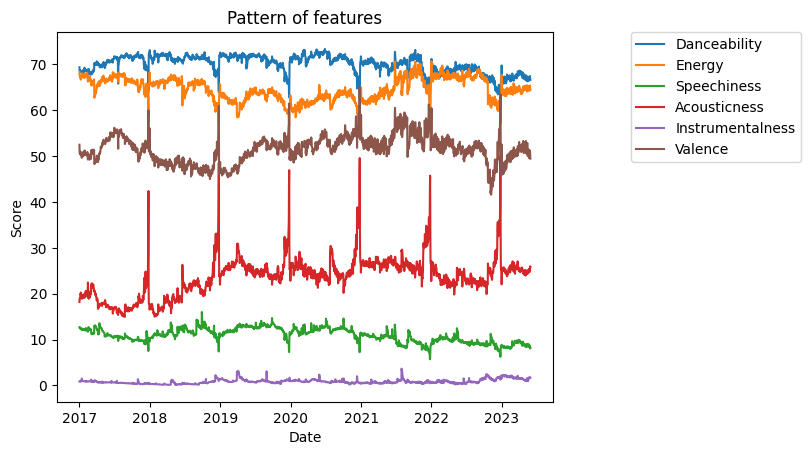

In [20]:
for col in df_features_daily.columns:
    if col == 'Loudness':
        continue
    plt.plot(df_features_daily.index, df_features_daily[col], label=col)
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1.0),borderaxespad = 0.)
plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Pattern of features')
plt.show()

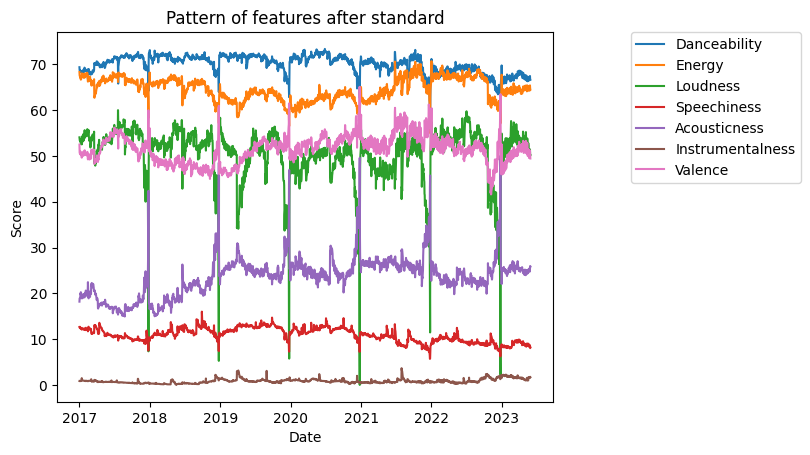

In [21]:
for col in df_features_daily_std.columns:
    plt.plot(df_features_daily_std.index, df_features_daily_std[col], label=col)
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1.0),borderaxespad = 0.)
plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Pattern of features after standard')
plt.show()

In [22]:
for year in [2017, 2018, 2019, 2020, 2021, 2022]:
    print("=====================")
    print("Year {}:".format(year))
    print(spotify[(spotify['Date'].dt.month == 12) & (spotify['Date'].dt.year == year)]['Title'].value_counts()[:5])

Year 2017:
Title
Sensualidad                                   155
Báilame - Remix                               155
Ahora Dice                                    116
Ghostface Killers                             112
Happy Xmas (War Is Over) - Remastered 2010    104
Name: count, dtype: int64
Year 2018:
Title
Te Boté - Remix    186
Bubalu             155
Asesina - Remix    145
Jackie Chan        108
Thunderclouds      108
Name: count, dtype: int64
Year 2019:
Title
Quizas                248
Bellaquita - Remix    180
Hola - Remix          155
Chi                   155
Otro Trago - Remix    145
Name: count, dtype: int64
Year 2020:
Title
Relación - Remix                                                                     155
La Jeepeta - Remix                                                                   145
It's Beginning to Look a Lot Like Christmas (with Mitchell Ayres & His Orchestra)     96
La Curiosidad                                                                         93
U L

It's Xmas!

## Try to smooth the December

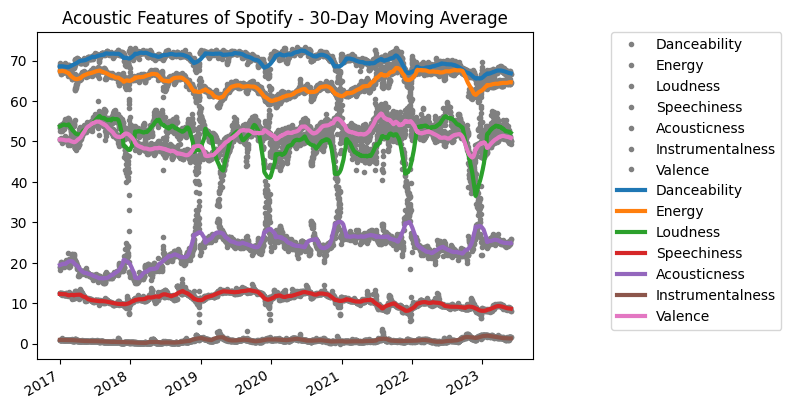

In [23]:
moving_average = df_features_daily_std.rolling(
    window=60,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=30,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df_features_daily_std.plot(style=".", color="0.5", legend=False)
ax2 = moving_average.plot(
    ax=ax, linewidth=3, title="Acoustic Features of Spotify - 30-Day Moving Average", legend=True,
)
ax2.legend(loc='upper right', bbox_to_anchor=(1.5,1.0),borderaxespad = 0.)

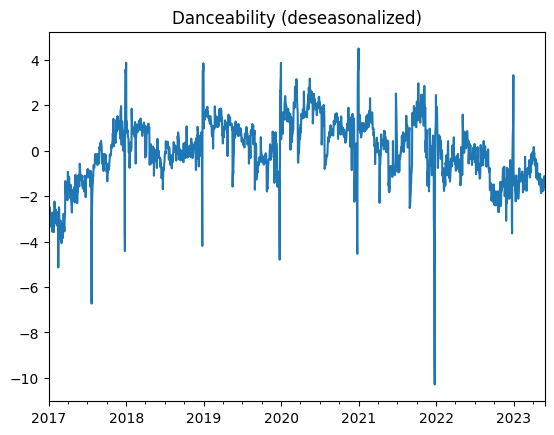

In [24]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

y = df_features_daily_std["Danceability"]
y.index = y.index.astype("period[D]")

fourier = CalendarFourier(freq='Y', order=4)
dp = DeterministicProcess(
    constant=True,
    index=y.index,
    order=1,
    seasonal=True,
    drop=True,
    additional_terms=[fourier],
)
X_time = dp.in_sample()
X_time['December'] = (X_time.index.month == 12)
X_time['NewYearsDay'] = (X_time.index.dayofyear == 1)

model = LinearRegression(fit_intercept=False)
model.fit(X_time, y)
y_deseason = y - model.predict(X_time)
y_deseason.name = 'Danceability_deseasoned'


ax = y_deseason.plot()
ax.set_title("Danceability (deseasonalized)");

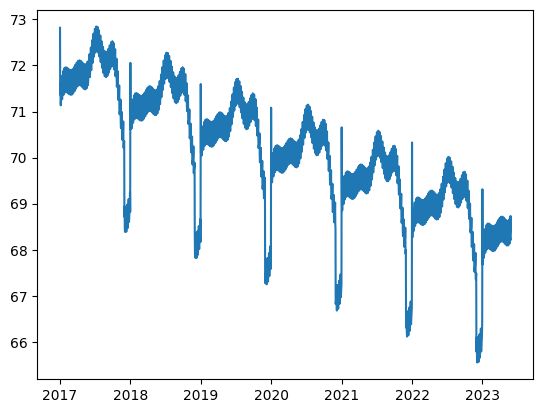

In [25]:
plt.plot( df_features_daily_std.index, y-y_deseason)

Trend of trend?

# SerialDependence

## Setup

In [26]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'

def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax

def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

/var/folders/lw/cbxh4d5n6nj91c7dnbv6yy740000gn/T/ipykernel_9453/1603320723.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [27]:
df_danceability = df_features_daily_std["Danceability"]
df3 = pd.DataFrame({
    'Danceability': df_danceability,
    'Danceability_lag_1': df_danceability.shift(1),
})

## Plot the Lag plot and partial autocorrelation

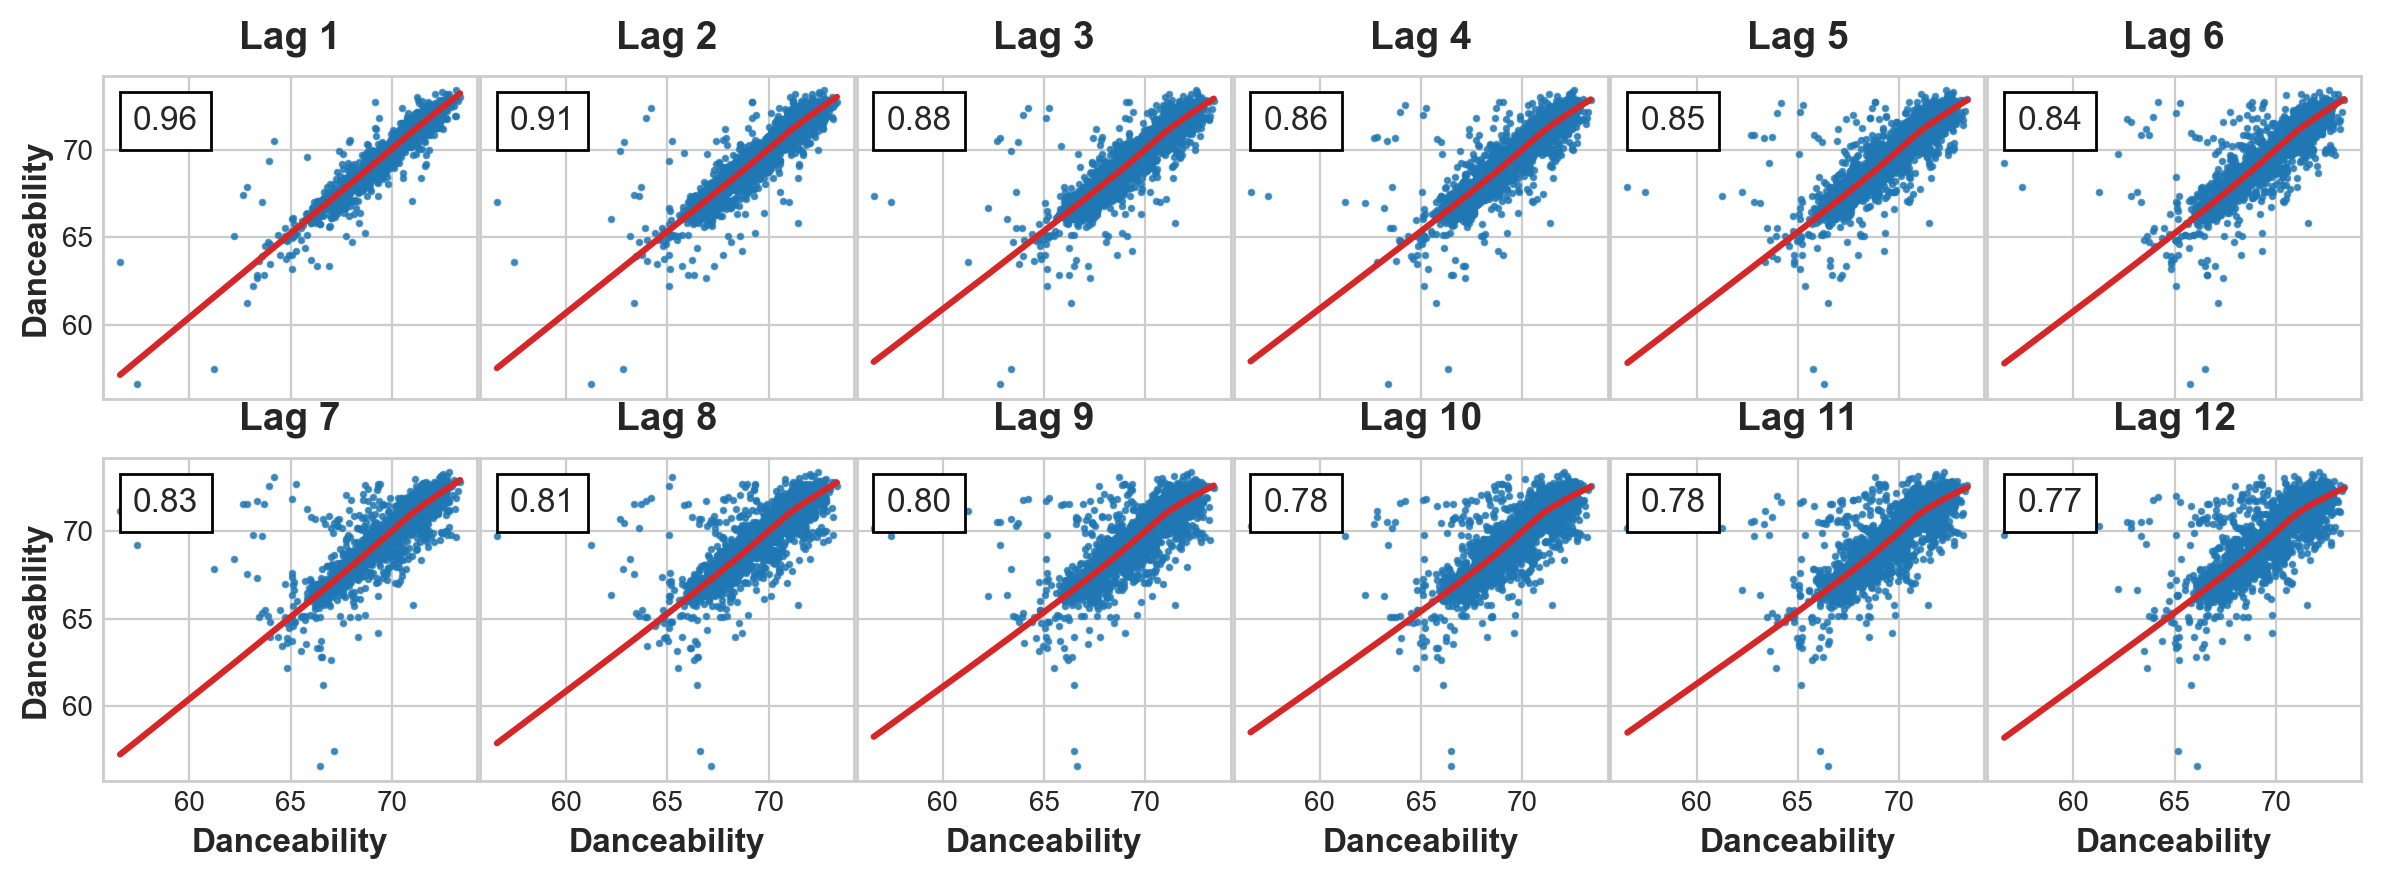

In [28]:
_ = plot_lags(df_danceability, lags=12, nrows=2)

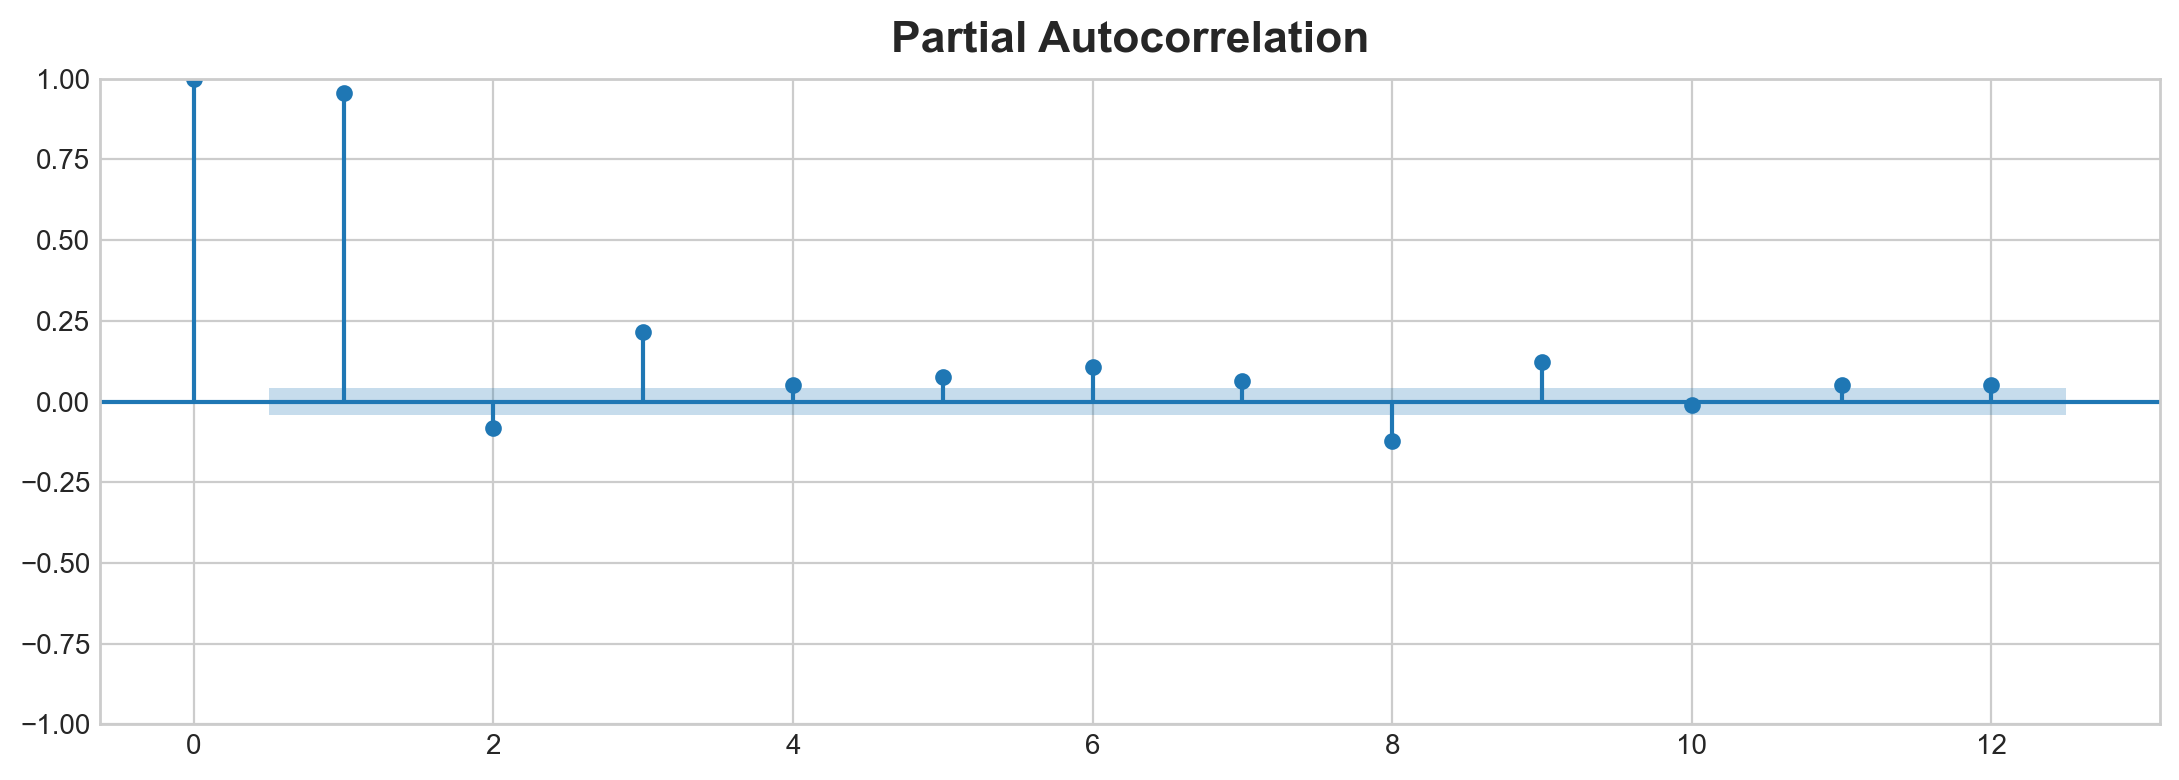

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf

_ = plot_pacf(df_danceability, lags=12)

lag_1 through lag_9 fall outside the intervals of "no correlation" (in blue), so we choose lag_1 through lag_9 as features

## Dumy Linear Regression

In [30]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(df_danceability, lags=9)
X = X.fillna(0.0)

In [31]:
X

,y_lag_1,y_lag_2,y_lag_3,y_lag_4,y_lag_5,y_lag_6,y_lag_7,y_lag_8,y_lag_9
2017-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-02,69.377595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-03,68.676675,69.377595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,68.670750,68.676675,69.377595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-05,68.591655,68.670750,68.676675,69.377595,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2023-05-25,66.718410,66.669490,66.544985,66.449065,67.206215,66.968285,66.704105,66.615400,66.487785
2023-05-26,66.963870,66.718410,66.669490,66.544985,66.449065,67.206215,66.968285,66.704105,66.615400
2023-05-27,67.359475,66.963870,66.718410,66.669490,66.544985,66.449065,67.206215,66.968285,66.704105
2023-05-28,67.465020,67.359475,66.963870,66.718410,66.669490,66.544985,66.449065,67.206215,66.968285


In [32]:
# Create target series and data splits
y = df_danceability.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

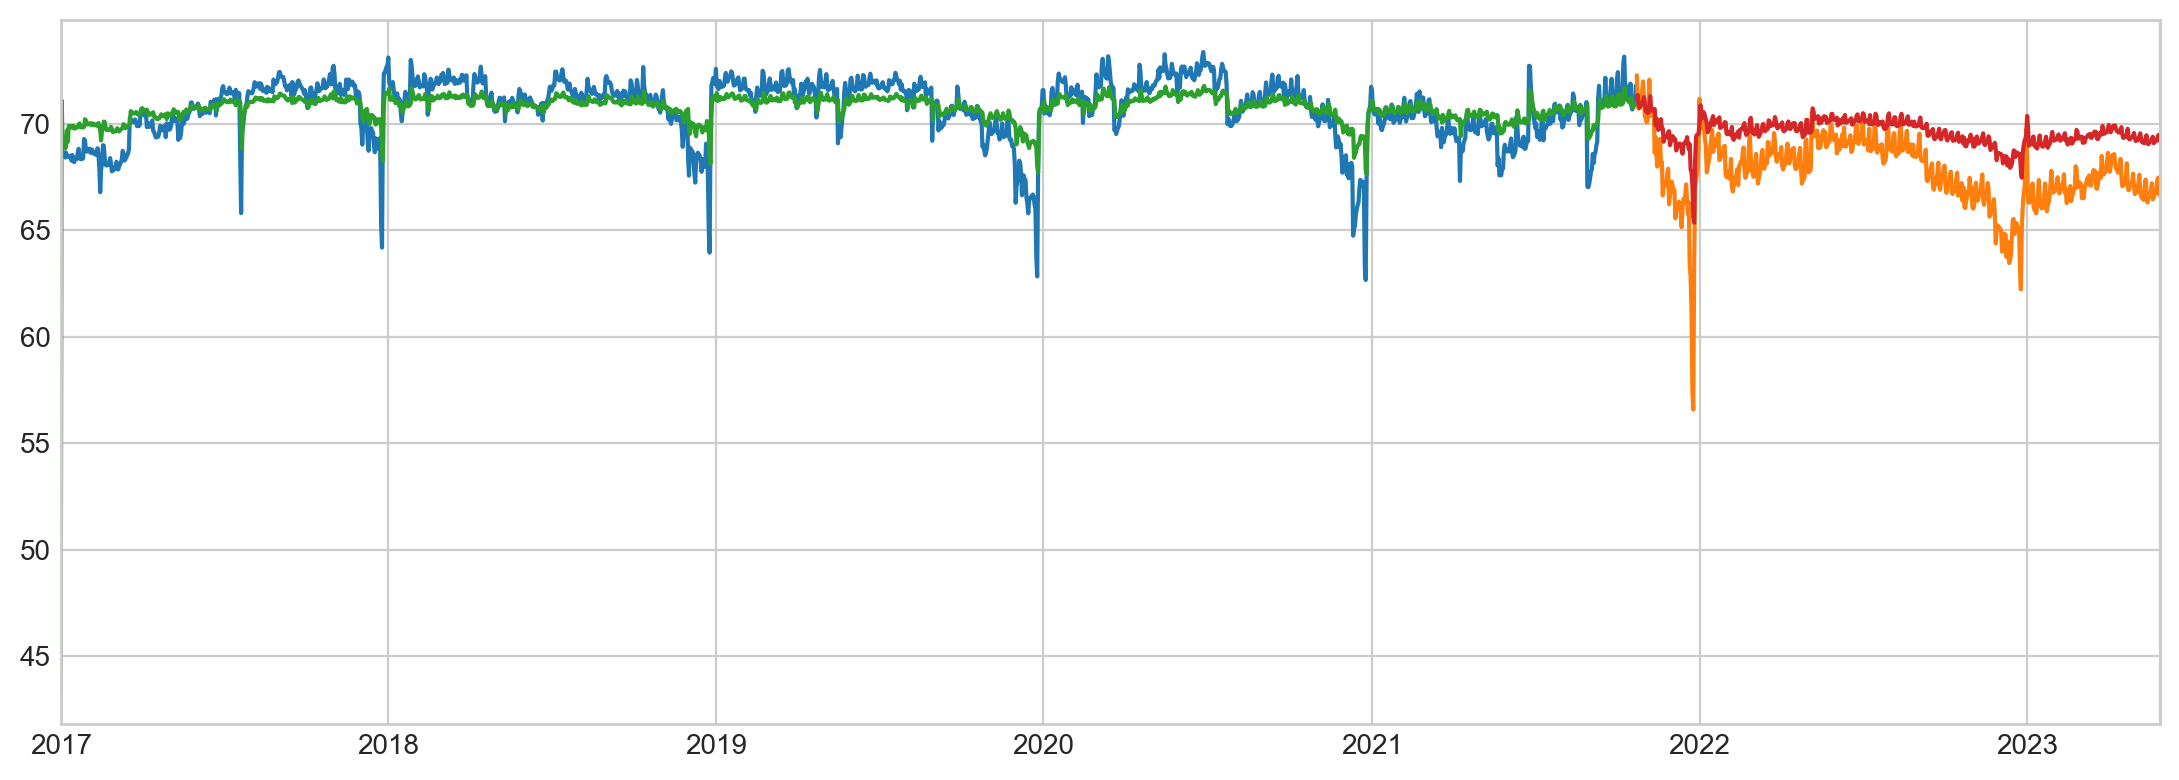

In [33]:
ax = y_train.plot()
ax = y_test.plot()
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

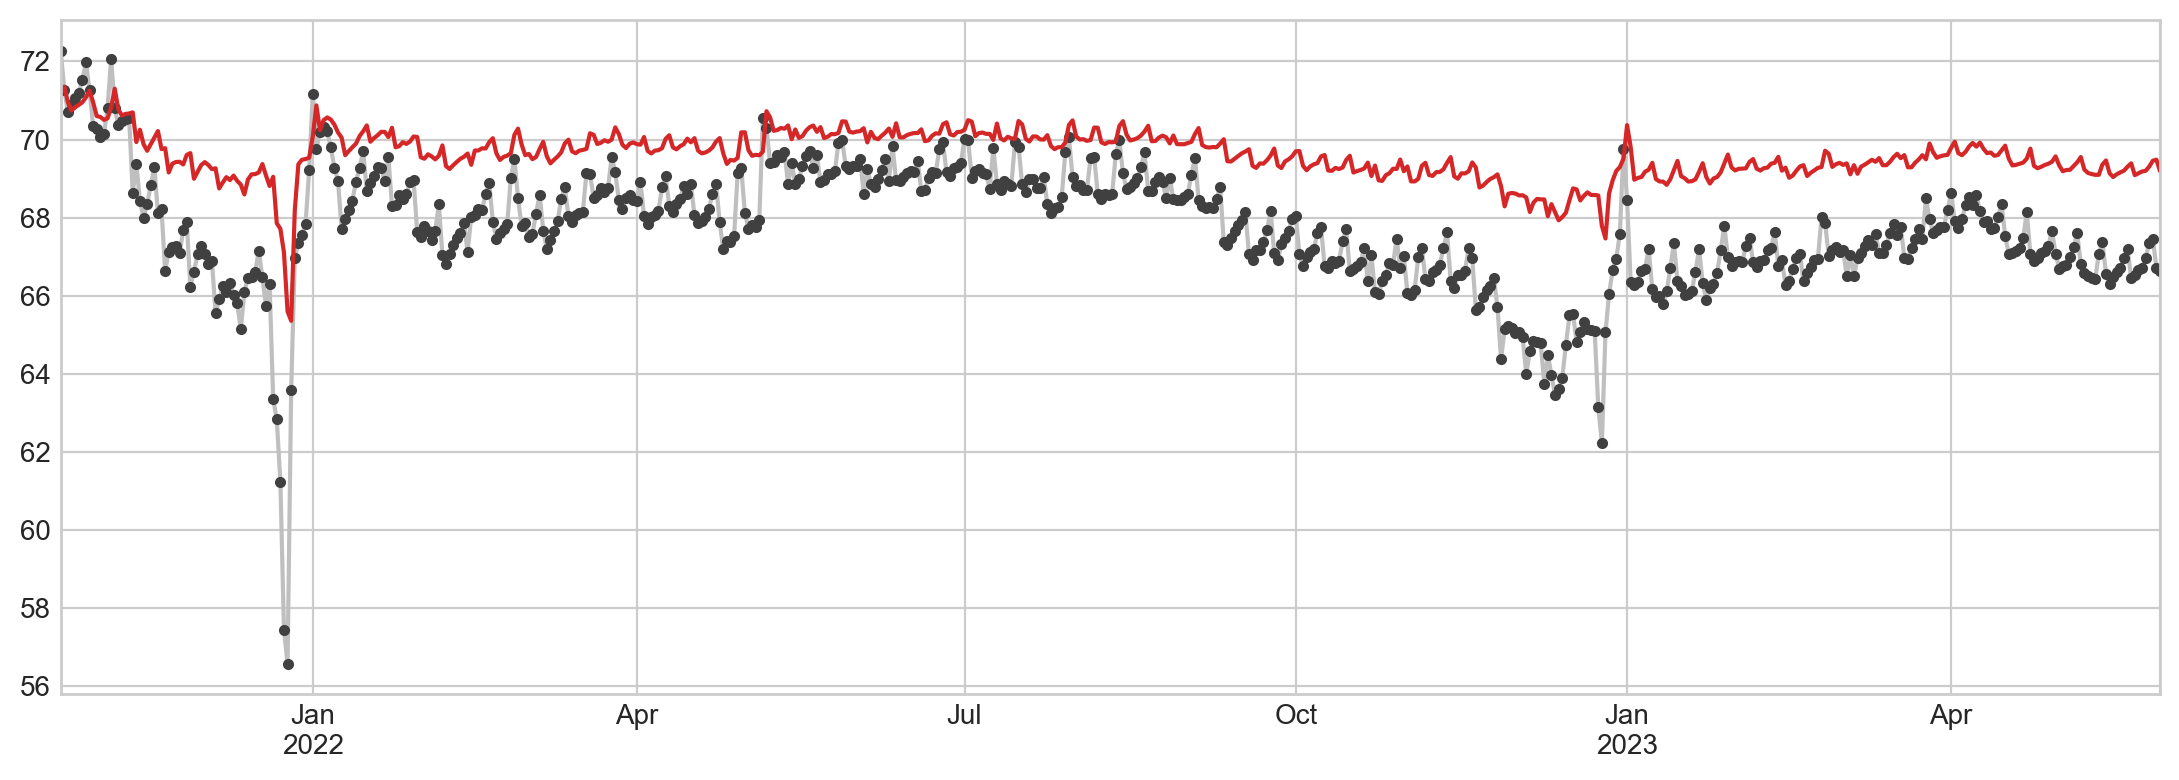

In [34]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

Drop the first 9 rows seems to get a better result (why?)

In [35]:
# Create target series and data splits
y = df_danceability.copy()

X_train, X_test, y_train, y_test = train_test_split(X[9:], y[9:], shuffle=False)

# Fit and predict
model = LinearRegression()  # `fit_intercept=True` since we didn't use DeterministicProcess
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

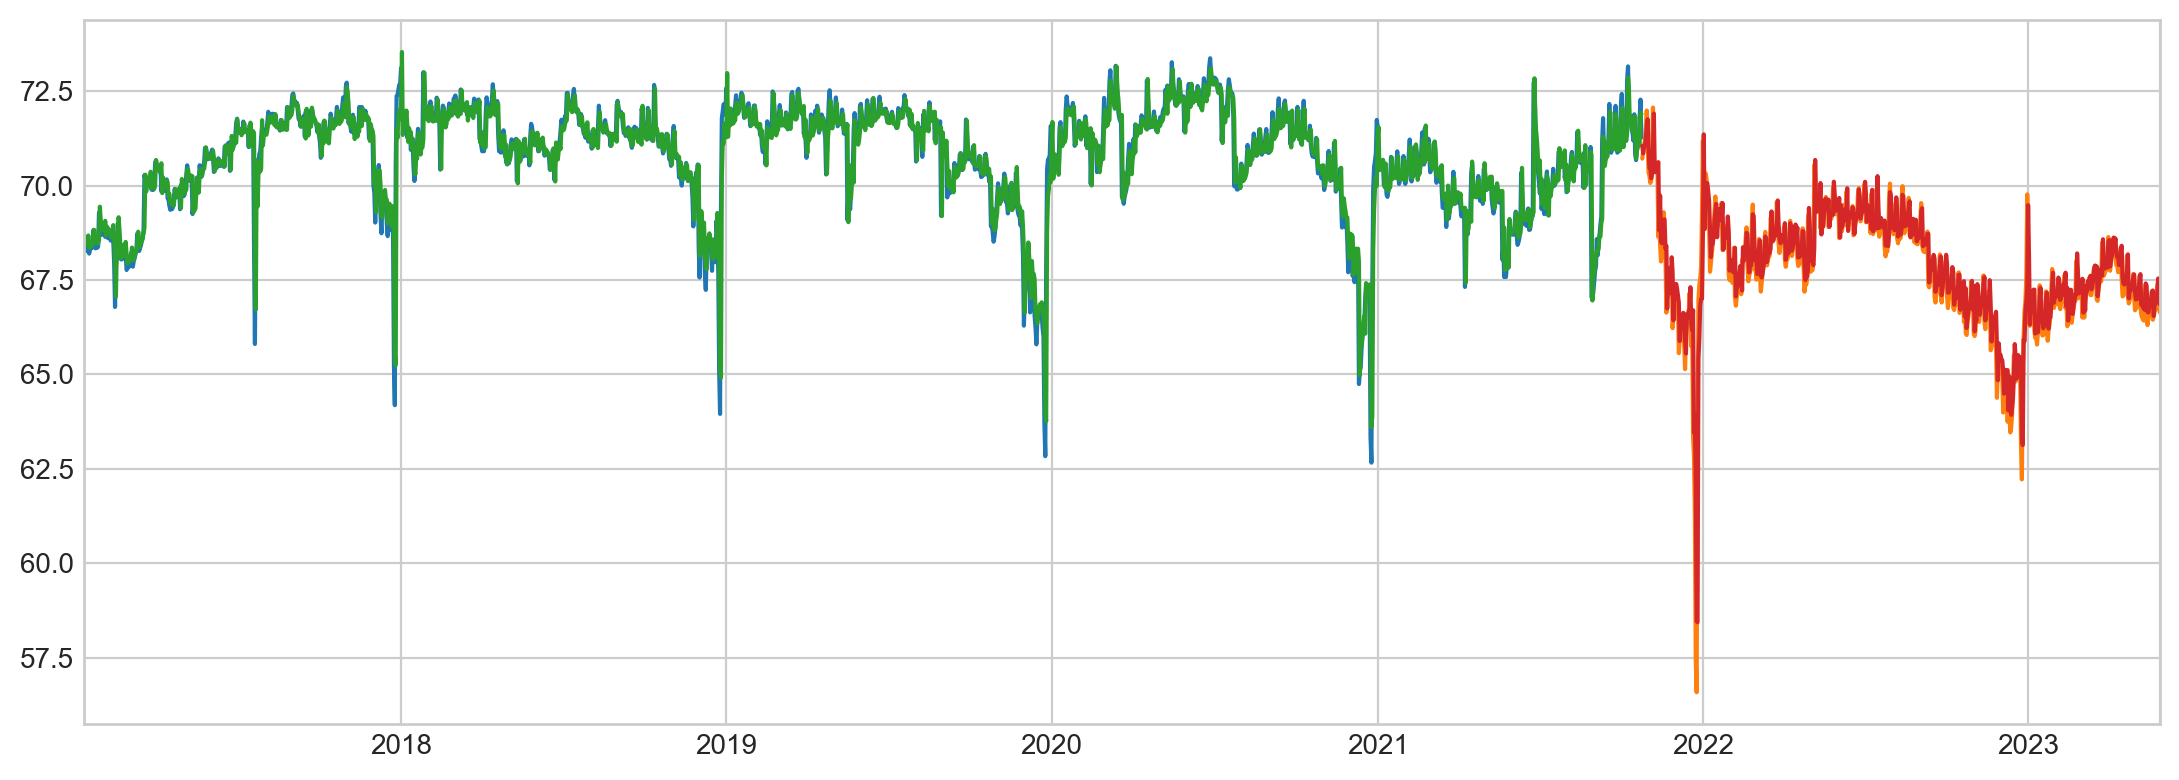

In [36]:
ax = y_train.plot()
ax = y_test.plot()
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

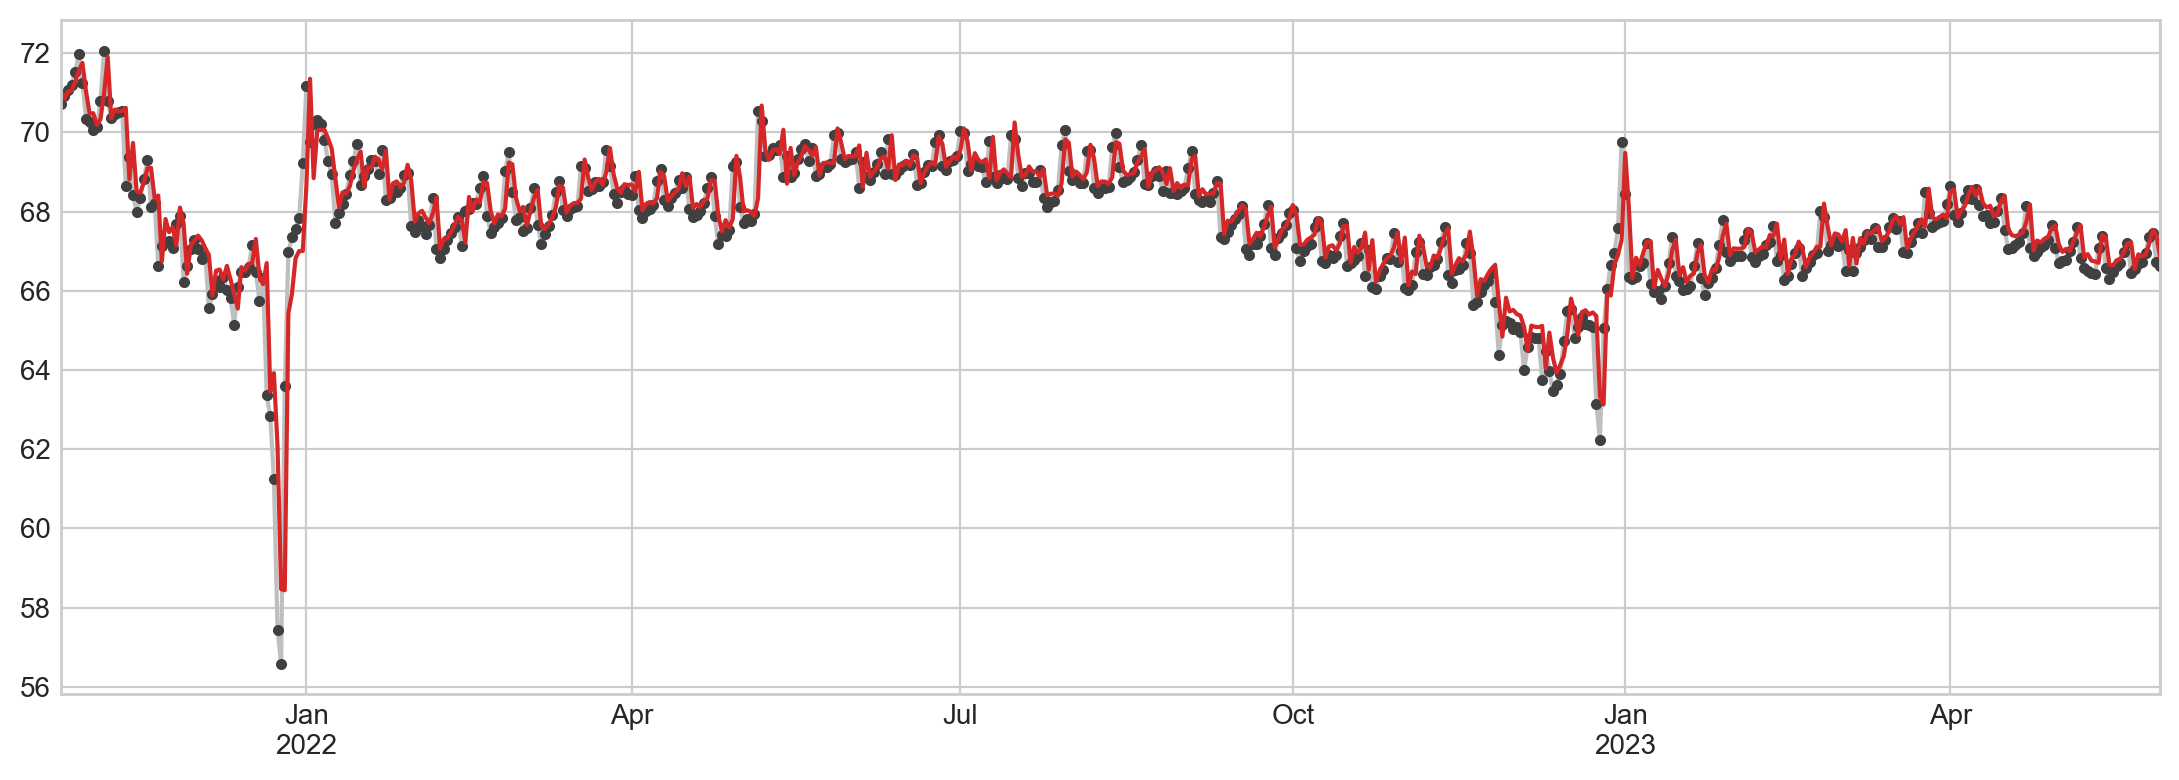

In [37]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')